# Starter Code ADE20K
This notebook contains a tutorial on how to explore data in ADE20K

In [19]:
%load_ext autoreload
%autoreload 2
import IPython.display
import matplotlib.pyplot as plt
import cv2
import numpy as np
import pickle as pkl
import utils_ade20k

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
ls 

ade20k_starter.ipynb  index_ade20k.pkl  __pycache__/  utils_ade20k.py


## Dataset index

In [21]:
# Load index with global information about ADE20K
DATASET_PATH = '/data/vision/torralba/datasets/ade20k/release/'
index_file = 'index_ade20k.pkl'
with open(index_file, 'rb') as f:
    index_ade20k = pkl.load(f)

In [22]:

print("File loaded, description of the attributes:")
print('--------------------------------------------')
for attribute_name, desc in index_ade20k['description'].items():
    print('* {}: {}'.format(attribute_name, desc))
print('--------------------------------------------\n')

i = 20390
nfiles = len(index_ade20k['filename'])
file_name = index_ade20k['filename'][i]
num_obj = index_ade20k['objectPresence'][:, i].sum()
num_parts = index_ade20k['objectIsPart'][:, i].sum()
count_obj = index_ade20k['objectPresence'][:, i].max()
obj_id = np.where(index_ade20k['objectPresence'][:, i] == count_obj)[0][0]
obj_name = index_ade20k['objectnames'][obj_id]
full_file_name = '{}/{}'.format(index_ade20k['folder'][i], index_ade20k['filename'][i])
print("The dataset has {} images".format(nfiles))
print("The image at index {} is {}".format(i, file_name))
print("It is located at {}".format(full_file_name))
print("It happens in a {}".format(index_ade20k['scene'][i]))
print("It has {} objects, of which {} are parts".format(num_obj, num_parts))
print("The most common object is object {} ({}), which appears {} times".format(obj_name, obj_id, count_obj))

File loaded, description of the attributes:
--------------------------------------------
* filename: array of length N=27574 with the image file names
* folder: array of length N with the image folder names.
* scene: array of length N providing the scene name (same classes as the Places database) for each image.
* objectIsPart: array of size [C, N] counting how many times an object is a part in each image. objectIsPart[c,i]=m if in image i object class c is a part of another object m times. For objects, objectIsPart[c,i]=0, and for parts we will find: objectIsPart[c,i] = objectPresence(c,i)
* objectPresence: array of size [C, N] with the object counts per image. objectPresence(c,i)=n if in image i there are n instances of object class c.
* objectcounts: array of length C with the number of instances for each object class.
* objectnames: array of length C with the object class names.
* proportionClassIsPart: array of length C with the proportion of times that class c behaves as a part. 

In [27]:
index_ade20k['folder'][0]

'ADE20K_2021_17_01/images/ADE/training/transportation/airport_terminal'

## Loading a segmentation object
We will visualize the same obejct we were studying before

In [30]:
from collections import Counter
Counter([x.split('/')[-3] for x in index_ade20k['folder']])

Counter({'training': 25574, 'validation': 2000})

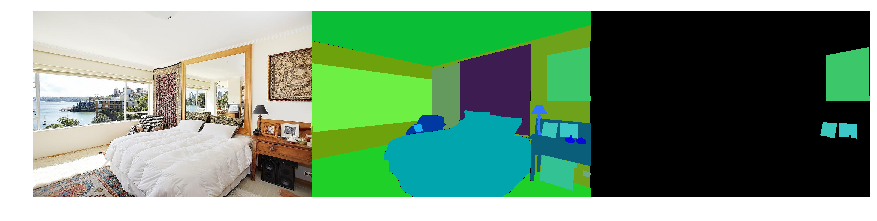

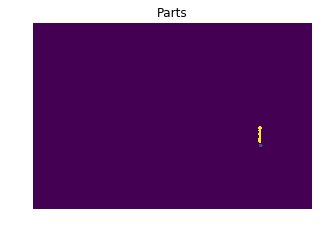

In [8]:
root_path = DATASET_PATH
info = utils_ade20k.loadAde20K('{}/{}'.format(root_path, full_file_name))
img = cv2.imread(info['img_name'])[:,:,::-1]
seg = cv2.imread(info['segm_name'])[:,:,::-1]
seg_mask = seg.copy()
seg_mask[info['class_mask'] != obj_id+1] *= 0
plt.figure(figsize=(15,5))

plt.imshow(np.concatenate([img, seg, seg_mask], 1))
plt.axis('off')
if len(info['partclass_mask']):
    plt.figure(figsize=(5*len(info['partclass_mask']), 5))
    plt.title('Parts')
    plt.imshow(np.concatenate(info['partclass_mask'],1))
    plt.axis('off')



You can also inspect the attributes `info['objects']` and `info['parts']` for information about object names, attributes etc.

## Amodal segmentation and Polygons
We also provide access to the original polygons annotated, as well as the amodal segmentation of object instances

(-0.5, 3071.5, 681.5, -0.5)

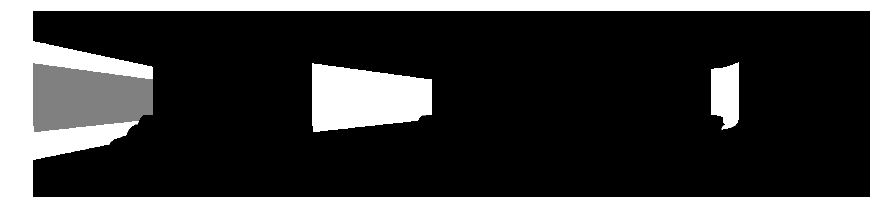

In [9]:
# We have a segmentation for every object instance, showing object bounds without occlusions
instances = [4, 5, 7]
images = []
for instance in instances:
    file_instance = '{}/{}/instance_{:03}_{}'.format(
        root_path, full_file_name.replace('.jpg', ''), instance, file_name.replace('.jpg', '.png'))
    aux = cv2.imread(file_instance)
    images.append(aux)
plt.figure(figsize=(5*len(images), 5))
plt.imshow(np.concatenate(images, 1))
plt.axis('off')

Finally we can get the original polygons

(-0.5, 1023.5, 681.5, -0.5)

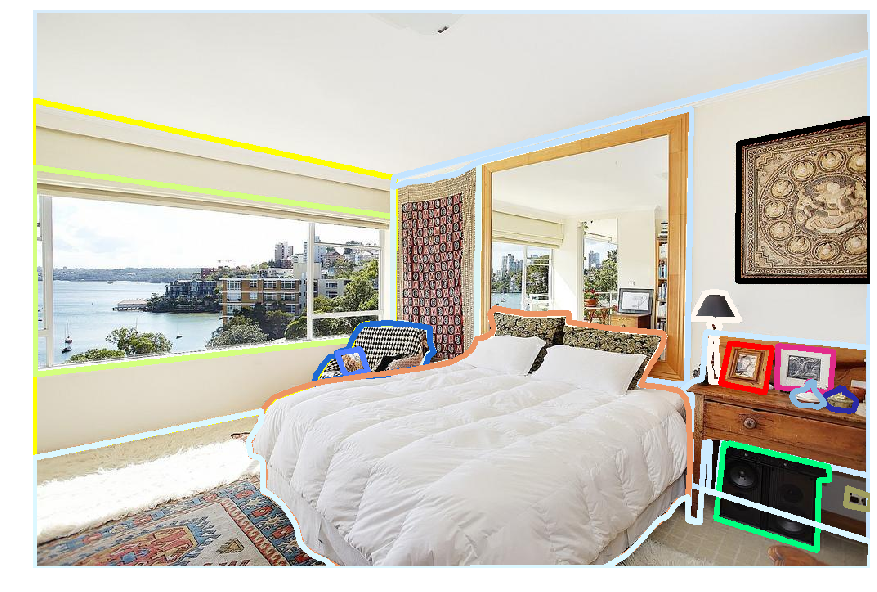

In [10]:
img = utils_ade20k.plot_polygon('{}/{}'.format(root_path, full_file_name), info)
plt.figure(figsize=(15,15))
plt.imshow(img[:, :, ::-1])
plt.axis('off')